# NYC Taxi Fare Prediction

## Setup

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from geopy import distance

## Inspection

In [193]:
taxi = pd.read_csv('train_prev.csv')        # Truncated preview
taxi.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [194]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [195]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Cleaning

### Pickup Datetime

In [196]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'], infer_datetime_format=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   key                1000000 non-null  object             
 1   fare_amount        1000000 non-null  float64            
 2   pickup_datetime    1000000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   1000000 non-null  float64            
 4   pickup_latitude    1000000 non-null  float64            
 5   dropoff_longitude  999990 non-null   float64            
 6   dropoff_latitude   999990 non-null   float64            
 7   passenger_count    1000000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


### NaN Values

In [197]:
taxi.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999990 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                999990 non-null  object             
 1   fare_amount        999990 non-null  float64            
 2   pickup_datetime    999990 non-null  datetime64[ns, UTC]
 3   pickup_longitude   999990 non-null  float64            
 4   pickup_latitude    999990 non-null  float64            
 5   dropoff_longitude  999990 non-null  float64            
 6   dropoff_latitude   999990 non-null  float64            
 7   passenger_count    999990 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


### Fare Amount

<Axes: xlabel='fare_amount'>

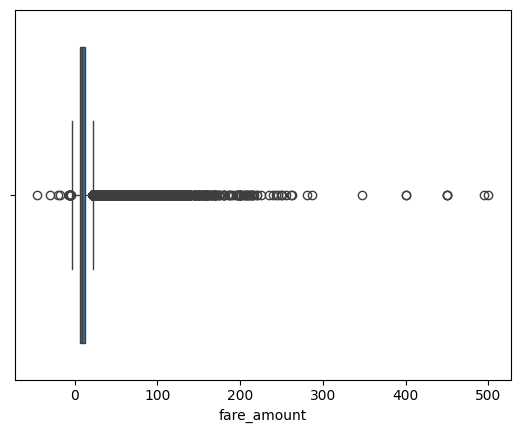

In [198]:
sns.boxplot(data=taxi, x='fare_amount')

In [199]:
# len(taxi.loc[~taxi['fare_amount'].between(0, 200)])
taxi = taxi.loc[taxi['fare_amount'].between(0, 200)]
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999914 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                999914 non-null  object             
 1   fare_amount        999914 non-null  float64            
 2   pickup_datetime    999914 non-null  datetime64[ns, UTC]
 3   pickup_longitude   999914 non-null  float64            
 4   pickup_latitude    999914 non-null  float64            
 5   dropoff_longitude  999914 non-null  float64            
 6   dropoff_latitude   999914 non-null  float64            
 7   passenger_count    999914 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 68.7+ MB


### Pickup Longitude

<Axes: xlabel='pickup_longitude'>

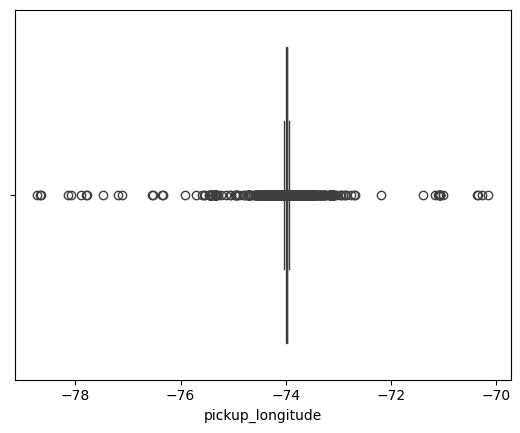

In [200]:
sns.boxplot(data=taxi.loc[taxi['pickup_longitude'].between(-80, -70)], x='pickup_longitude')

In [201]:
# len(taxi.loc[~taxi['pickup_longitude'].between(-75, -73)])
taxi = taxi.loc[taxi['pickup_longitude'].between(-75, -73)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,980346.000000,980346.000000,980346.000000,980346.000000,980346.000000,980346.000000
mean,11.327184,-73.975143,40.752143,-73.911776,40.716951,1.684982
std,9.622849,0.039104,0.934873,3.161143,3.878349,1.307802
min,0.000000,-74.972872,0.000000,-1329.621332,-3114.338567,0.000000
25%,6.000000,-73.992272,40.736565,-73.991565,40.735495,1.000000
50%,8.500000,-73.982082,40.753407,-73.980570,40.753837,1.000000
75%,12.500000,-73.968308,40.767575,-73.965240,40.768406,2.000000
max,200.000000,-73.036247,424.083332,45.581619,1651.553433,6.000000


### Pickup Latitude

<Axes: xlabel='pickup_latitude'>

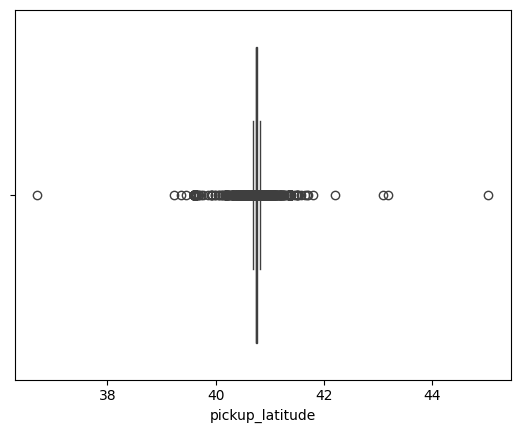

In [202]:
sns.boxplot(data=taxi.loc[taxi['pickup_latitude'].between(30, 50)], x='pickup_latitude')

In [203]:
# len(taxi.loc[~taxi['pickup_latitude'].between(40, 41)])
taxi = taxi.loc[taxi['pickup_latitude'].between(40, 41)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,979760.000000,979760.000000,979760.000000,979760.000000,979760.000000,979760.000000
mean,11.324052,-73.975435,40.750809,-73.912081,40.716894,1.685126
std,9.599790,0.035655,0.027456,3.160298,3.879045,1.307951
min,0.000000,-74.968142,40.052722,-1329.621332,-3114.338567,0.000000
25%,6.000000,-73.992276,40.736563,-73.991567,40.735488,1.000000
50%,8.500000,-73.982087,40.753394,-73.980576,40.753828,1.000000
75%,12.500000,-73.968333,40.767547,-73.965267,40.768395,2.000000
max,200.000000,-73.036247,40.999287,45.581619,1651.553433,6.000000


### Dropoff Longitude

<Axes: xlabel='dropoff_longitude'>

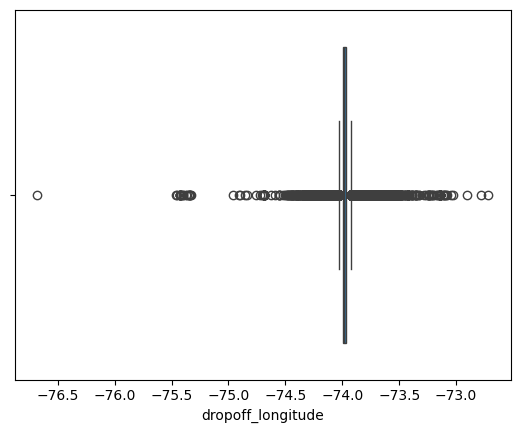

In [204]:
sns.boxplot(data=taxi.loc[taxi['dropoff_longitude'].between(-80, -70)], x='dropoff_longitude')

In [205]:
# len(taxi.loc[~taxi['dropoff_longitude'].between(-75, -73)])
taxi = taxi.loc[taxi['dropoff_longitude'].between(-75, -73)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,978804.000000,978804.000000,978804.000000,978804.000000,978804.000000,978804.000000
mean,11.319573,-73.975444,40.750815,-73.974466,40.752249,1.685154
std,9.584835,0.035605,0.027435,0.035778,0.926526,1.307868
min,0.000000,-74.968142,40.052722,-74.960020,0.000000,0.000000
25%,6.000000,-73.992277,40.736566,-73.991576,40.735566,1.000000
50%,8.500000,-73.982088,40.753395,-73.980598,40.753857,1.000000
75%,12.500000,-73.968337,40.767548,-73.965347,40.768405,2.000000
max,200.000000,-73.036247,40.999287,-73.029770,405.650000,6.000000


### Dropoff Latitude

<Axes: xlabel='dropoff_latitude'>

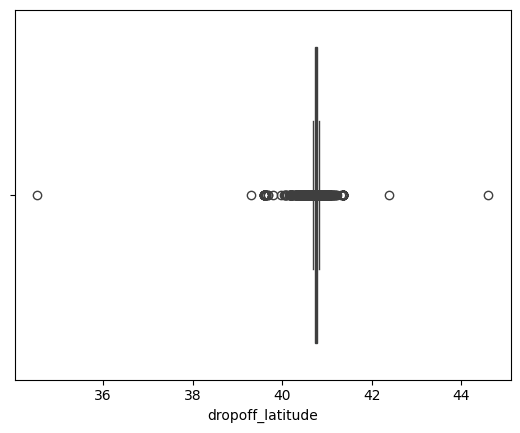

In [206]:
sns.boxplot(data=taxi.loc[taxi['dropoff_latitude'].between(30, 50)], x='dropoff_latitude')

In [207]:
# len(taxi.loc[~taxi['dropoff_latitude'].between(40, 41)])
taxi = taxi.loc[taxi['dropoff_latitude'].between(40, 41)]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,978631.000000,978631.000000,978631.000000,978631.000000,978631.000000,978631.000000
mean,11.314007,-73.975448,40.750815,-73.974496,40.751192,1.685185
std,9.548877,0.035592,0.027429,0.035450,0.031295,1.307894
min,0.000000,-74.968142,40.052722,-74.960020,40.041180,0.000000
25%,6.000000,-73.992277,40.736566,-73.991577,40.735570,1.000000
50%,8.500000,-73.982089,40.753394,-73.980600,40.753857,1.000000
75%,12.500000,-73.968338,40.767547,-73.965356,40.768402,2.000000
max,200.000000,-73.036247,40.999287,-73.029770,40.998754,6.000000


### Passenger Count

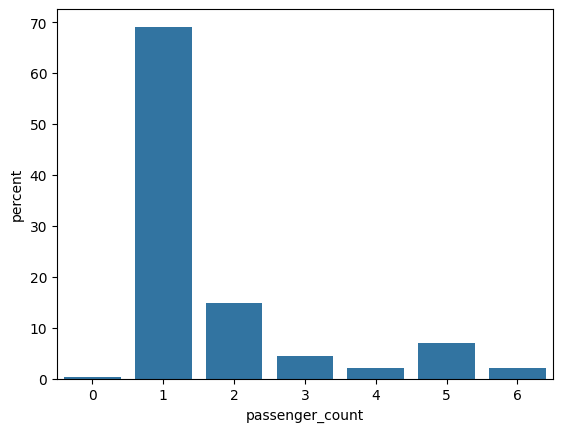

In [208]:
passenger_plt = sns.countplot(data=taxi, x='passenger_count', stat='percent')

In [209]:
# len(taxi.loc[taxi['passenger_count'] == 0])
taxi = taxi.loc[taxi['passenger_count'] != 0]
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,975150.000000,975150.000000,975150.000000,975150.000000,975150.000000,975150.000000
mean,11.323361,-73.975439,40.750810,-73.974489,40.751187,1.691200
std,9.558604,0.035617,0.027436,0.035471,0.031303,1.306338
min,0.000000,-74.968142,40.052722,-74.960020,40.041180,1.000000
25%,6.000000,-73.992277,40.736562,-73.991575,40.735569,1.000000
50%,8.500000,-73.982088,40.753391,-73.980600,40.753856,1.000000
75%,12.500000,-73.968337,40.767546,-73.965348,40.768401,2.000000
max,200.000000,-73.036247,40.999287,-73.029770,40.998754,6.000000


### Summary

In [210]:
taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,975150.000000,975150.000000,975150.000000,975150.000000,975150.000000,975150.000000
mean,11.323361,-73.975439,40.750810,-73.974489,40.751187,1.691200
std,9.558604,0.035617,0.027436,0.035471,0.031303,1.306338
min,0.000000,-74.968142,40.052722,-74.960020,40.041180,1.000000
25%,6.000000,-73.992277,40.736562,-73.991575,40.735569,1.000000
50%,8.500000,-73.982088,40.753391,-73.980600,40.753856,1.000000
75%,12.500000,-73.968337,40.767546,-73.965348,40.768401,2.000000
max,200.000000,-73.036247,40.999287,-73.029770,40.998754,6.000000


In [211]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975150 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                975150 non-null  object             
 1   fare_amount        975150 non-null  float64            
 2   pickup_datetime    975150 non-null  datetime64[ns, UTC]
 3   pickup_longitude   975150 non-null  float64            
 4   pickup_latitude    975150 non-null  float64            
 5   dropoff_longitude  975150 non-null  float64            
 6   dropoff_latitude   975150 non-null  float64            
 7   passenger_count    975150 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 67.0+ MB


## Feature Engineering

In [184]:
taxi['distance_km'] = taxi.apply(lambda r:distance.distance((r['pickup_latitude'], r['pickup_longitude']),(r['dropoff_latitude'], r['dropoff_longitude'])).km, axis=1)